The Fashion-MNIST dataset is proposed as a more challenging replacement dataset for the MNIST dataset.

It is a dataset comprised of 60,000 small square 28×28 pixel grayscale images of items of 10 types of clothing, such as shoes, t-shirts, dresses, and more. The mapping of all 0-9 integers to class labels is listed below.

0: T-shirt/top
1: Trouser
2: Pullover
3: Dress
4: Coat
5: Sandal
6: Shirt
7: Sneaker
8: Bag
9: Ankle boot


It is a more challenging classification problem than MNIST and top results are achieved by deep learning convolutional neural networks with a classification accuracy of about 90% to 95% on the hold out test dataset.

In [0]:
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dropout
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd



2.2.0


**NOW WE WILL LOAD THE FASHION MNIST DATASET**

In [0]:
data=tf.keras.datasets.fashion_mnist

NOW WE WILL SPLIT THE DATASET INTO TRAIN AND TEST DATA

In [0]:
(x_train, y_train),(x_test, y_test)=data.load_data()

In [0]:
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)


In [0]:
class_names=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

LETS DISPLAY THE DATASET THAT WE ARE WORKING WITH!!

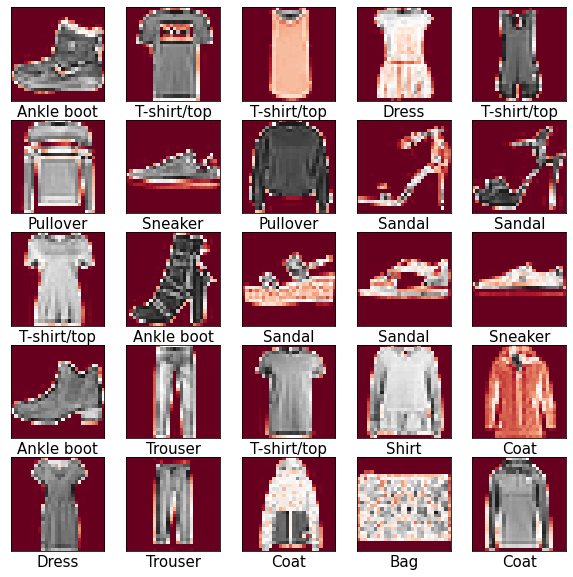

In [0]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(training_images[i],cmap=plt.cm.RdGy)
  plt.xlabel(class_names[y_train[i]],fontsize=15)
plt.show()

## Now we wil **normalise** our data

In [0]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [0]:
print("Number of train data - " + str(len(x_train)))
print("Number of test data - " + str(len(x_test)))

Number of train data - 60000
Number of test data - 10000


## Now we will split the dataset further into train, test and validation set

In [0]:
# Further break training data into train / validation sets (# put 5000 into validation set and keep remaining 55,000 for train)
(x_train, x_valid) = x_train[5000:], x_train[:5000] 
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Print training set shape
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training, validation, and test datasets
print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

x_train shape: (55000, 28, 28, 1) y_train shape: (55000, 10)
55000 train set
5000 validation set
10000 test set


In [0]:
print("x_train shape:", x_train.shape, "test_images shape:", y_train.shape)

x_train shape: (55000, 28, 28, 1) test_images shape: (55000, 10)


# Now, we will define our model

In [0]:
callback=mycallback()
model= Sequential()
model.add(Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(1024,activation='relu'))
model.add(Dense(10,activation='softmax'))

Now we will look into the summary of the model

In [0]:
model.summary()
"""
In the cOnv2D layer the output shape is (none,26,26,64) instead of 28 28 because Conv2d c, as we have used a 3*3 filter thus we cant use the edges for calculations hence, 
2 pixels from X layer and twp pixel from y layer will get deductted thus the ooutput layer is that.
MAXPOOL= now as we are using the maxpoolin 2*2 thus , it will half the output shape(13,13,64)
"""

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               819712    
_________________________________________________________________
dense_4 (Dense)              (None, 1024)             

'\nIn the cOnv2D layer the output shape is (none,26,26,64) instead of 28 28 because Conv2d c, as we have used a 3*3 filter thus we cant use the edges for calculations hence, \n2 pixels from X layer and twp pixel from y layer will get deductted thus the ooutput layer is that.\nMAXPOOL= now as we are using the maxpoolin 2*2 thus , it will half the output shape(13,13,64)\n'

Now we will compile our model wiht the help of Adam optimiser

In [0]:

a=model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
history=model.fit(x_train,y_train,batch_size=64,epochs=10,validation_data=(x_valid,y_valid))


Epoch 1/10
860/860 [==============================] - 94s 109ms/step - loss: 0.0719 - accuracy: 0.9720 - val_loss: 0.3443 - val_accuracy: 0.9198
Epoch 2/10
860/860 [==============================] - 96s 112ms/step - loss: 0.0619 - accuracy: 0.9768 - val_loss: 0.3957 - val_accuracy: 0.9120
Epoch 3/10
860/860 [==============================] - 94s 109ms/step - loss: 0.0571 - accuracy: 0.9786 - val_loss: 0.4029 - val_accuracy: 0.9164
Epoch 4/10
860/860 [==============================] - 97s 112ms/step - loss: 0.0518 - accuracy: 0.9802 - val_loss: 0.3996 - val_accuracy: 0.9176
Epoch 5/10
860/860 [==============================] - 95s 111ms/step - loss: 0.0447 - accuracy: 0.9836 - val_loss: 0.3964 - val_accuracy: 0.9192
Epoch 6/10
860/860 [==============================] - 99s 116ms/step - loss: 0.0408 - accuracy: 0.9849 - val_loss: 0.4335 - val_accuracy: 0.9140
Epoch 7/10
860/860 [==============================] - 105s 122ms/step - loss: 0.0355 - accuracy: 0.9871 - val_loss: 0.4951 - val_a

In [0]:
score = model.evaluate(x_test, y_test)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

313/313 [==============================] - 6s 20ms/step - loss: 0.6146 - accuracy: 0.9124
Loss: 0.6146
Accuracy: 0.9124


In [0]:
# Define the text labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

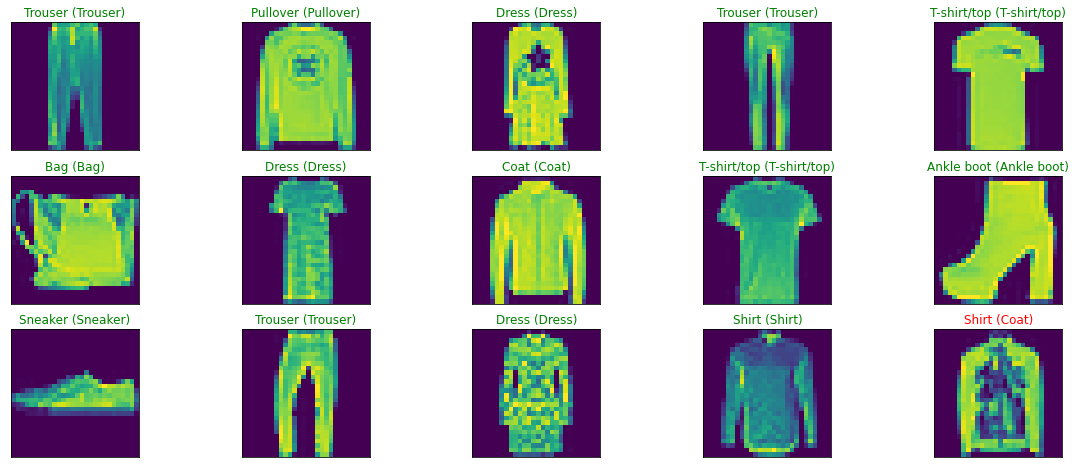

In [0]:
y_hat = model.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

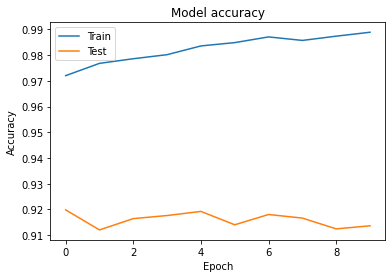

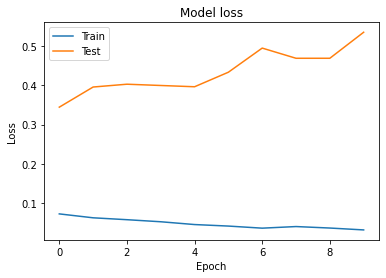

In [0]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()